<a href="https://colab.research.google.com/github/gnoejh/ict1022/blob/main/Components/skippass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Components of Neural Networks

## Residual Connections (Skip Pass)

Residual connections, also known as skip connections, are a fundamental component of deep neural networks like ResNet. They help in mitigating the vanishing gradient problem and allow for training much deeper networks.

## Theory

In deep networks, as the number of layers increases, training becomes challenging due to issues like vanishing gradients. Residual connections allow gradients to flow directly through the network, facilitating better training of deeper models.

## Mathematical Formulation

A residual block can be represented as:

$ y = F(x, \{W_i\}) + x $

Where:
- $ x $ is the input to the residual block.\n
- $ F(x, \{W_i\}) $ represents the layers within the residual block (e.g., two convolutional layers).
- $ y $ is the output.
  
Using Mermaid draw the above equation

```mermaid
graph LR
    A[x] --> B["$$F(x, {W_i})$$"]
    B -->   C["$$+$$"]
    A[x] --> C
    C --> D[y]
```

## Comparison of Residual Connection Variations

Residual connections (or skip connections) have been widely used to ease the training of deep neural networks. Below is a table comparing several common variations of residual connections, including their mathematical formulations and brief explanations.

| **Variation**            | **Mathematical Formulation**                                 | **Explanation**                                                                                                                                                        |
|--------------------------|--------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Standard Residual**    | $$ y = x + F(x) $$                                            | This is the basic residual block where the input \(x\) is directly added to the output of a function \(F(x)\) (e.g., a stack of conv, normalization, activation layers). |
| **Bottleneck Residual**  | $$ y = x + F(x) $$  with  $$F(x) = W_3 \, \sigma(W_2 \, \sigma(W_1 \, x))$$  | In this design, \(F(x)\) is computed using a bottleneck structure (typically 1×1, 3×3, and 1×1 convolutions) to reduce the number of parameters and computational cost while preserving representational power. |
| **Pre-activation Residual** | $$ y = x + F(x) $$  with  $$F(x) = F(\sigma(\text{BN}(x)))$$  | Here, the activation (typically ReLU) and batch normalization (BN) are applied *before* the convolutional layers inside \(F(x)\). This ordering improves gradient flow and regularizes the network.  |
| **Scaled Residual**      | $$ y = x + \alpha \, F(x) $$                                   | A scaling factor \(\alpha\) (often less than 1) is applied to the residual branch. This can help stabilize the training in extremely deep networks by controlling the magnitude of the residual contribution.  |
| **Projection Shortcut**  | $$ y = W_s \, x + F(x) $$                                      | When the dimensions of \(x\) and \(F(x)\) do not match, a projection matrix \(W_s\) (often implemented via a \(1 \times 1\) convolution) is used to transform \(x\) so that it can be added to \(F(x)\).  |

Each variation modifies the basic residual design to address different training challenges, such as mismatched dimensions, vanishing gradients, or computational efficiency. This table provides a concise comparison to help in selecting the appropriate residual connection variant for a given architecture.


# Backpropagation Derivation: With and Without Skip Connections

In this note, we derive the backpropagation equations for two very simple cases:

1. **Without a Skip Connection:**  
   $$ y = w x $$
2. **With a Skip Connection:**  
   $$ y = w x + x $$

We assume that during the backward pass we have the upstream gradient:
$$
\delta = \frac{\partial L}{\partial y},
$$
where $L(y)$ is the loss.

---

## Case 1: No Skip Connection

Consider:
$$
y = w x.
$$

### Forward Pass
- $ y = w x $

### Backward Pass

1. **Gradient with respect to $w$:**

   Using the chain rule:
   $$
   \frac{\partial L}{\partial w} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial w}.
   $$

   Since
   $$
   \frac{\partial y}{\partial w} = x,
   $$
   we have:
   $$
   \frac{\partial L}{\partial w} = \delta \, x.
   $$

2. **Gradient with respect to $x$:**

   Similarly,
   $$
   \frac{\partial L}{\partial x} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial x}.
   $$

   And since
   $$
   \frac{\partial y}{\partial x} = w,
   $$
   we obtain:
   $$
   \frac{\partial L}{\partial x} = \delta \, w.
   $$

---

## Case 2: With a Skip Connection

Consider:
$$
y = w x + x.
$$

This can be factored as:
$$
y = (w + 1)x.
$$

### Forward Pass
- $ y = w x + x $

### Backward Pass

1. **Gradient with respect to $w$:**

   Notice that only the term $w x$ depends on $w$. Therefore:
   $$
   \frac{\partial y}{\partial w} = x.
   $$
   Applying the chain rule:
   $$
   \frac{\partial L}{\partial w} = \delta \, x.
   $$

2. **Gradient with respect to $x$:**

   Here, $y$ depends on $x$ in two ways:
   
   - From the $w x$ term:
     $$
     \frac{\partial (w x)}{\partial x} = w.
     $$
     
   - From the $x$ term (the skip connection):
     $$
     \frac{\partial x}{\partial x} = 1.
     $$
   
   Thus, summing both contributions:
   $$
   \frac{\partial y}{\partial x} = w + 1.
   $$
   
   And by the chain rule:
   $$
   \frac{\partial L}{\partial x} = \delta (w + 1).
   $$

---

## Comparison of the Two Cases

- **Gradient with respect to $w$:**

  - **No Skip:**  
    $$
    \frac{\partial L}{\partial w} = \delta \, x.
    $$
  - **With Skip:**  
    $$
    \frac{\partial L}{\partial w} = \delta \, x.
    $$
  
  The gradient with respect to the weight $w$ is the same in both cases.

- **Gradient with respect to $x$:**

  - **No Skip:**  
    $$
    \frac{\partial L}{\partial x} = \delta \, w.
    $$
  - **With Skip:**  
    $$
    \frac{\partial L}{\partial x} = \delta \, (w + 1).
    $$
  
  The key difference is in the gradient with respect to $x$:  
  with the skip connection, an additional term of $\delta$ is added. This extra gradient ensures that even if $w$ is small (or vanishing), the gradient backpropagated to $x$ does not vanish completely. This property is one of the key benefits of skip (residual) connections as it helps preserve gradient flow in deeper networks.

---


## Diagram

```mermaid
graph LR
    A(Input) --> B(Conv Layer)
    B --> C(Batch Norm)
    C --> D(ReLU)
    D --> E(Conv Layer)
    E --> F(Batch Norm)
    F --> G(Add x)
    G --> H(ReLU)
    H --> I(Output)

    A --> G
```

## Benefits of Residual Connections

| Benefit                | Description                                       |
|------------------------|---------------------------------------------------|
| Mitigate Vanishing Gradient | Helps gradients flow through the network more effectively during training. |
| Facilitate Deeper Networks | Enables the construction of much deeper neural networks without performance degradation. |
| Improve Accuracy          | Often results in better performance and accuracy in tasks such as image recognition. |

In [1]:
import torch
import torch.nn as nn

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = self.relu(out)
        return out

# Example usage:
if __name__ == '__main__':
    block = ResidualBlock(64, 64)
    x = torch.randn(1, 64, 56, 56)
    y = block(x)
    print(y.shape)

torch.Size([1, 64, 56, 56])


Using device: cuda
Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:03<00:00, 2.49MB/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 164kB/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 1.68MB/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<?, ?B/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw


Training network WITHOUT skip connections:
No Skip - Epoch  1: Training Loss = 0.2579
Test Accuracy: 98.27%
No Skip - Epoch  2: Training Loss = 0.0488
Test Accuracy: 98.84%
No Skip - Epoch  3: Training Loss = 0.0363
Test Accuracy: 98.96%
No Skip - Epoch  4: Training Loss = 0.0289
Test Accuracy: 98.90%
No Skip - Epoch  5: Training Loss = 0.0242
Test Accuracy: 99.02%
Total training time (no skip): 114.88 seconds


Training network WITH skip connections:
Skip     - Epoch  1: Training Loss = 0.2789
Test Accuracy: 97.94%
Skip     - Epoch  2: Training Loss = 0.0545
Test Accuracy: 98.89%
Skip     - Epoch  3: Training Loss = 0.0388
Test Accuracy: 99.07%
Skip     - Epoch  4: Training Loss = 0.0310
Test Accuracy: 98.93%
Skip     - Epoch  5: Training Loss = 0.0263
Test Accuracy: 98.91%
Total training time (skip): 120.38 seconds



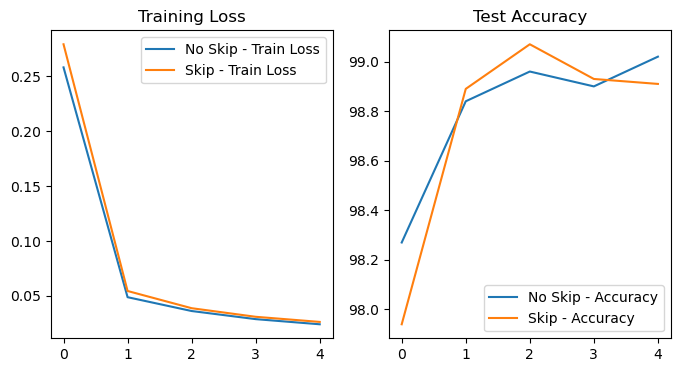

In [2]:
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define a basic block without skip connections
class BasicBlockNoSkip(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlockNoSkip, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3,
                               stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out = F.relu(out)
        return out

# Define a basic block with skip (residual) connections
class BasicBlockSkip(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlockSkip, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3,
                               stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        # Create a shortcut branch to match dimensions if needed
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
        
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)  # Add the skip connection
        out = F.relu(out)
        return out

# Network without skip connections
class SimpleCNNNoSkip(nn.Module):
    def __init__(self, num_classes=10):
        super(SimpleCNNNoSkip, self).__init__()
        self.layer1 = BasicBlockNoSkip(1, 16, stride=1)
        self.layer2 = BasicBlockNoSkip(16, 32, stride=2)
        self.layer3 = BasicBlockNoSkip(32, 64, stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(64, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.avgpool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

# Network with skip connections
class SimpleCNNSkip(nn.Module):
    def __init__(self, num_classes=10):
        super(SimpleCNNSkip, self).__init__()
        self.layer1 = BasicBlockSkip(1, 16, stride=1)
        self.layer2 = BasicBlockSkip(16, 32, stride=2)
        self.layer3 = BasicBlockSkip(32, 64, stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(64, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.avgpool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

# Track metrics for plotting
train_losses_noskip, test_accuracies_noskip = [], []
train_losses_skip, test_accuracies_skip = [], []

# Training function for one epoch
def train(model, device, train_loader, optimizer, epoch, results_list):
    model.train()
    running_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch:2d}: Training Loss = {avg_loss:.4f}")
    results_list.append(avg_loss)  # <-- store average loss

# Testing function
def test(model, device, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            preds = output.argmax(dim=1, keepdim=True)
            correct += preds.eq(target.view_as(preds)).sum().item()
            total += data.size(0)
    accuracy = 100. * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")
    return accuracy

def main():
    # Use GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    # Define transforms and load MNIST dataset
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    
    train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
    test_dataset = datasets.MNIST('./data', train=False, download=True, transform=transform)
    
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)
    
    epochs = 5

    print("\nTraining network WITHOUT skip connections:")
    model_no_skip = SimpleCNNNoSkip().to(device)
    optimizer_no_skip = optim.Adam(model_no_skip.parameters(), lr=0.001)
    start_time = time.time()
    for epoch in range(1, epochs + 1):
        print("No Skip - ", end='')
        train(model_no_skip, device, train_loader, optimizer_no_skip, epoch, train_losses_noskip)
        accuracy = test(model_no_skip, device, test_loader)
        test_accuracies_noskip.append(accuracy)
    time_no_skip = time.time() - start_time
    print(f"Total training time (no skip): {time_no_skip:.2f} seconds\n")
    
    print("\nTraining network WITH skip connections:")
    model_skip = SimpleCNNSkip().to(device)
    optimizer_skip = optim.Adam(model_skip.parameters(), lr=0.001)
    start_time = time.time()
    for epoch in range(1, epochs + 1):
        print("Skip     - ", end='')
        train(model_skip, device, train_loader, optimizer_skip, epoch, train_losses_skip)
        accuracy = test(model_skip, device, test_loader)
        test_accuracies_skip.append(accuracy)
    time_skip = time.time() - start_time
    print(f"Total training time (skip): {time_skip:.2f} seconds\n")

    # Plot stored results after training
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.plot(train_losses_noskip, label='No Skip - Train Loss')
    plt.plot(train_losses_skip, label='Skip - Train Loss')
    plt.legend()
    plt.title('Training Loss')

    plt.subplot(1,2,2)
    plt.plot(test_accuracies_noskip, label='No Skip - Accuracy')
    plt.plot(test_accuracies_skip, label='Skip - Accuracy')
    plt.legend()
    plt.title('Test Accuracy')
    plt.show()

if __name__ == '__main__':
    main()
